<a href="https://colab.research.google.com/github/assaba/Climate-Data-and-Analysis/blob/main/Landsat_data_access.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio

This section shows how to import Landsat data based on Earth Explorer

It is replicating Abdishakur's tutorial: https://towardsdatascience.com/access-satellite-imagery-with-aws-and-google-colab-4660178444f5 

In [3]:
#install libraries
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show

It is first necessary to go on EarthExplorer and Identify the image you need 
Here for instance, we need the following values to build the URL
ID: LC08_L1TP_202036_20201031_20201106_01_T1
Acquisition Date: 2020-10-31
Path: 202
Row: 36

https://earthexplorer.usgs.gov/

In [5]:
#constructing URL path to import the image
fpath = "http://landsat-pds.s3.amazonaws.com/c1/L8/202/036/LC08_L1TP_202036_20201031_20201106_01_T1/LC08_L1TP_202036_20201031_20201106_01_T1_B4.TIF"

In [7]:
#creating an function that allows to open the image
def rasterio_open(f):
  return rio.open(f)

#open and store the image
src_image = rasterio_open(fpath)

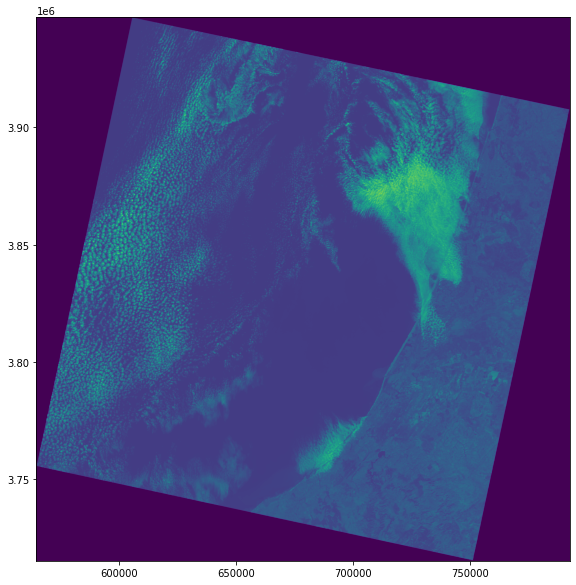

In [8]:
#now we can plot the image
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image, ax=ax)
plt.show()

In [11]:
#getting ride of the black corners of the image
#Turn the image into array with numpy
src_image_array = src_image.read(1)
src_image_array = src_image_array.astype('f4')
src_image_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
#replacing the nan values with null 
src_image_array[src_image_array==0] = np.nan

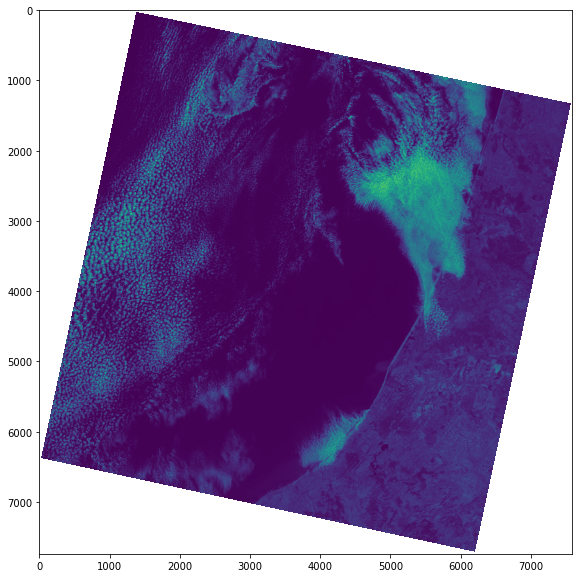

In [13]:
#Plotting the image again
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image_array, ax=ax)
plt.show()

Here is how we can pick just a subset of the image taken specific rows and columns

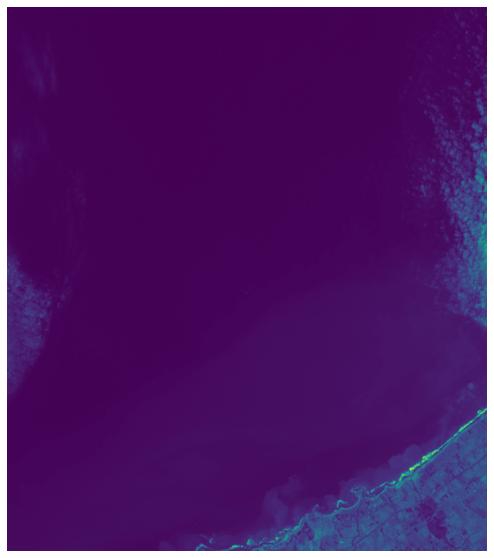

In [15]:
# Selecting a subset of the image
# Window(col_off, row_off, width, height)
window = rio.windows.Window(3000, 6000, 750, 850)
subset = src_image.read(1, window=window)
fig, ax = plt.subplots(1, figsize=(12, 10))
show(subset, ax=ax)
ax.set_axis_off()
plt.show()

**How to create an RGB Image out of the sattelite image downloaded**

In [17]:
#First it is necessary to download the various bands for an RGB file

rpath = "http://landsat-pds.s3.amazonaws.com/c1/L8/202/036/LC08_L1TP_202036_20201031_20201106_01_T1/LC08_L1TP_202036_20201031_20201106_01_T1_B4.TIF"
gpath = "http://landsat-pds.s3.amazonaws.com/c1/L8/202/036/LC08_L1TP_202036_20201031_20201106_01_T1/LC08_L1TP_202036_20201031_20201106_01_T1_B3.TIF"
bpath = "http://landsat-pds.s3.amazonaws.com/c1/L8/202/036/LC08_L1TP_202036_20201031_20201106_01_T1/LC08_L1TP_202036_20201031_20201106_01_T1_B2.TIF"

red = rio.open(rpath)
green = rio.open(gpath)
blue = rio.open(bpath)

In [30]:
# Create an RGB image
with rio.open('GB.tif','w',driver='Gtiff', width=red.width, height=red.height,count=3,crs=red.crs,transform=red.transform, dtype=red.dtypes[0]) as rag:
  rag.write(blue.read(1),1)
  rag.write(green.read(1),2)
  rag.write(red.read(1),3)
  rag.close()
#Image is normaly stored in working folder and can be accessed